##Assignment 2, part 1 of 2

1. A data warehouse for a music streaming company consists of the dimensions song, user, time (time and date of when the user listened to a song), and a measure called fee (fee paid by the streaming company to the artist every time a user listens to that song).
    1. Draw a schema diagram for the above data warehouse using a star schema.
    2. Starting with the base cuboid [time, user, song], what specific OLAP operations should be performed in order to list the total fee collected for a given song for a given month of a given year (e.g. October 2021)?
    3. Assume that the time dimension has 3 levels: day, month, year; and that the song and user dimensions both have 1 level (not including the virtual level 'all'). How many cuboids will this cube contain (including the base and apex cuboids)?

The star schema for the provided data warehouse is shown below in the diagram:

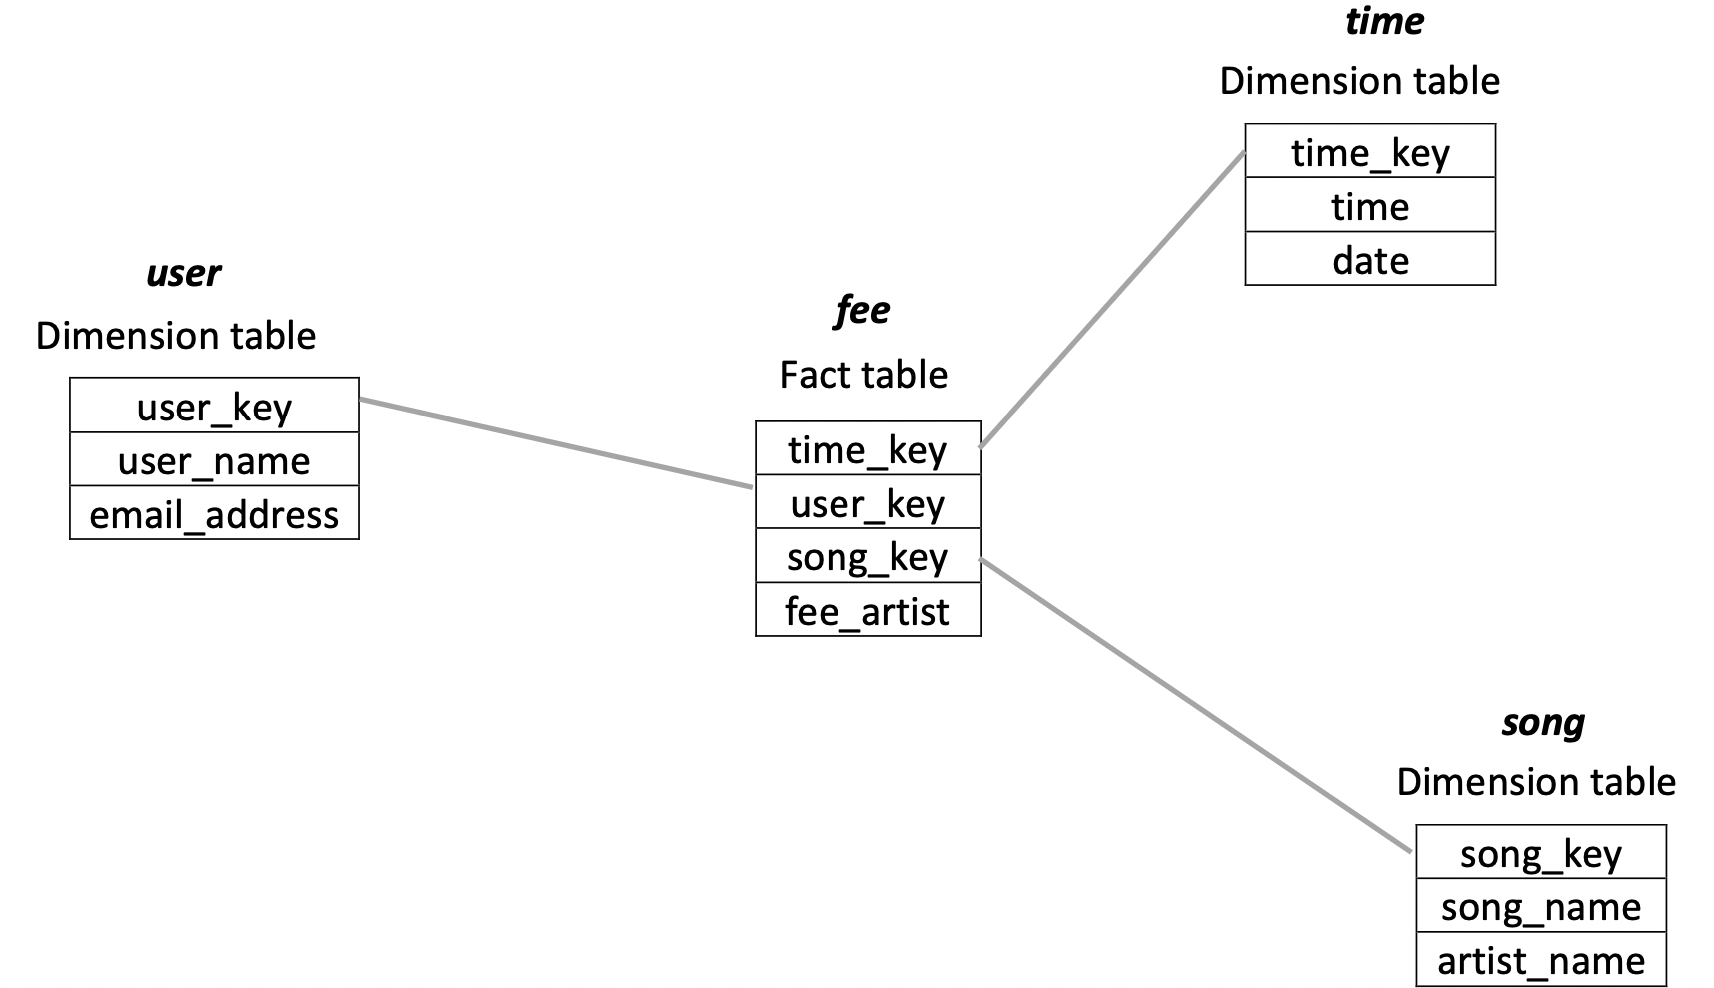

Dice and Roll-up OLAP operations should be performed in order to list the total fee collected for a given song for a given year.

Assuming the time dimension has 3 levels and the song and user dimensions both have 1 level, the cube will contain: (3+1)\*(1+1)\*(1+1) = 16 cuboids.

2. Using the same CSV file and data cube in the above lab tutorial, modify the "tutorial_model.json" file to include aggregate measures for the minimum and maximum amount in the data cube. Using these implemented aggregate measures, produce the values for the minimum and maximum amount in the data per year. Make sure to show your work in the PDF report. You can read the [Cubes package documentation](https://readthedocs.org/projects/cubes/downloads/pdf/latest/) for assistance in this task.

The figure below displays the modified part of the “tutorial_model.json” file to include the aggregate measures for the minimum and maximum amount in the data cube.

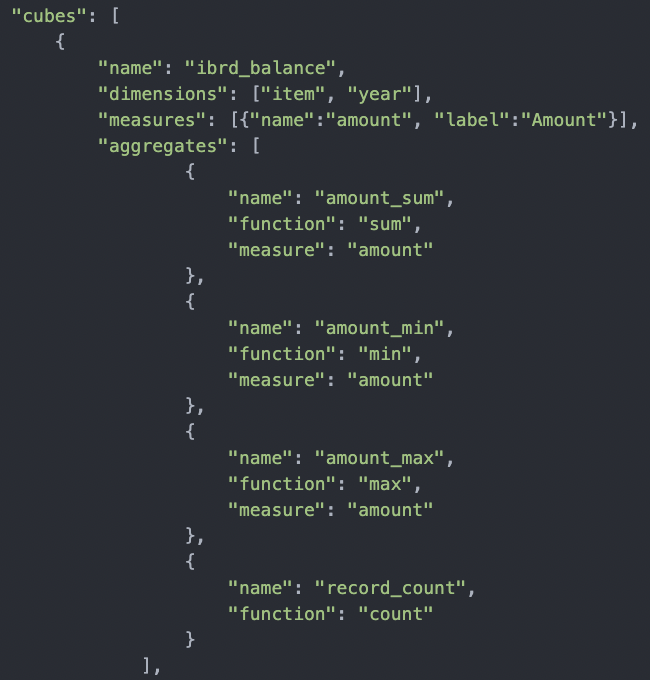

In [ ]:
#!pip install cubes
#!pip install -Iv sqlalchemy==1.3.9

from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv

In [ ]:
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )

In [ ]:
from cubes import Workspace

workspace1 = Workspace()
workspace1.register_default_store("sql", url="sqlite:///data.sqlite")

In [ ]:
workspace1.list_cubes()

[]

In [ ]:
workspace1.import_model("tutorial_model.json")

In [ ]:
cube1 = workspace1.cube("ibrd_balance")

In [ ]:
browser1 = workspace1.browser(cube1)

In [ ]:
result1 = browser1.aggregate()
result1.summary["record_count"]

62

In [ ]:
result1 = browser1.aggregate(drilldown=["year"])
for record in result1:
    print(record)

{'year': 2009, 'amount_sum': 550840, 'amount_min': -1683, 'amount_max': 110040, 'record_count': 31}
{'year': 2010, 'amount_sum': 566020, 'amount_min': -3043, 'amount_max': 128577, 'record_count': 31}


The output above shows the values for the minimum and maximum amount in the data per year, implementing the aggregate measures.

3. Consider the CSV file "country-income-large.csv":
   1. Load the CSV file using Cubes, create a JSON file for the data cube model, and create a data cube for the data. Use as dimensions the region, age, and online shopper fields. Use as measure the income. Define aggregate functions in the data cube model for the total, average, minimum, and maximum income. In your PDF report, show the relevant scripts and files you have created.
   2. Using the created data cube and data cube model, produce aggregate results for: the whole data cube; results per region; results per online shopping activity; and results for all people aged between 30 and 50.

The figure below shows the aggregate functions in the data cube model for the total, average, minimum and maximum income created in a JSON file using dimensions the region, age, online shopper fields and as measure the income field.

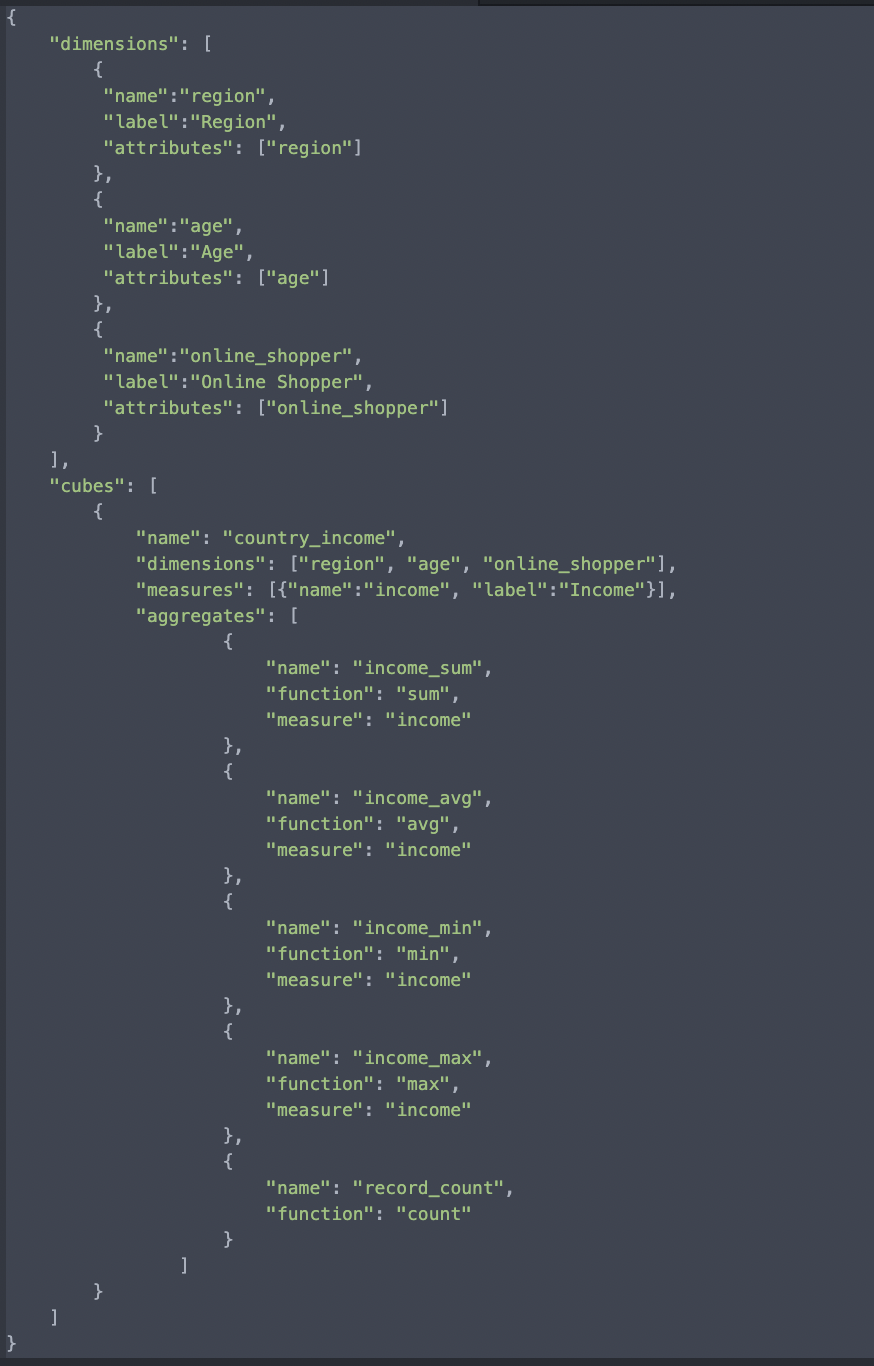

In [ ]:
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "country-income-large.csv",
                      table_name="country_income",
                      fields=[
                          ("region", "string"),
                          ("age", "integer"),
                          ("income", "integer"),
                          ("online_shopper", "string")],
                      create_id=True
                     )

In [ ]:
workspace2 = Workspace()
workspace2.register_default_store("sql", url="sqlite:///data.sqlite")

In [ ]:
workspace2.list_cubes()

[]

In [ ]:
workspace2.import_model("model.json")

In [ ]:
cube2 = workspace2.cube("country_income")

In [ ]:
browser2 = workspace2.browser(cube2)

In [ ]:
result2 = browser2.aggregate()
result2.summary["record_count"]

60

In [ ]:
result2.summary

{'income_avg': 85986.66666666667,
 'income_max': 143000,
 'income_min': 31000,
 'income_total': 5159200,
 'record_count': 60}

The output above shows the aggregate results for the whole data cube.

In [ ]:
result2 = browser2.aggregate(drilldown=["region"])
for record in result2:
    print(record)

{'region': 'Brazil', 'income_total': 1198200, 'income_avg': 79880.0, 'income_min': 31000, 'income_max': 135000, 'record_count': 15}
{'region': 'India', 'income_total': 1954200, 'income_avg': 84965.21739130435, 'income_min': 35000, 'income_max': 141000, 'record_count': 23}
{'region': 'USA', 'income_total': 2006800, 'income_avg': 91218.18181818182, 'income_min': 45000, 'income_max': 143000, 'record_count': 22}


The output above shows the aggregate results per region.

In [ ]:
result2 = browser2.aggregate(drilldown=["online_shopper"])
for record in result2:
    print(record)

{'online_shopper': 'No', 'income_total': 3150400, 'income_avg': 87511.11111111111, 'income_min': 31000, 'income_max': 143000, 'record_count': 36}
{'online_shopper': 'Yes', 'income_total': 2008800, 'income_avg': 83700.0, 'income_min': 41000, 'income_max': 139000, 'record_count': 24}


The output above shows the aggregate results per online shopping activity.

In [ ]:
import cubes as cubes
cuts = [cubes.RangeCut("age", [30], [50])]
cell = cubes.Cell(cube2, cuts)
result2 = browser2.aggregate(cell)
result2.summary

{'income_avg': 73352.0,
 'income_max': 93000,
 'income_min': 56000,
 'income_total': 1833800,
 'record_count': 25}

The output above shows the aggregate results for all people aged between 30 and 50.

##Assignment 2, part 2 of 2

1. Consider a dataset $\mathcal{D}$ that contains only two observations $\mathbf{x}_{1} = (1, -1)$ and $\mathbf{x}_2 = (-1, 1)$. Suppose that the class of the first observation is $y_1 = 0$ and that the class of the second observation is $y_2 = 1$. How would a 1-nearest neighbour classifier based on the Euclidean distance classify the observation $\mathbf{x} = (2, -3)$? What are the distances between this new observation and each observation in the dataset?

The Euclidean distance between the new observation ($\mathbf{x}$) and the first observation ($\mathbf{x}_1$):

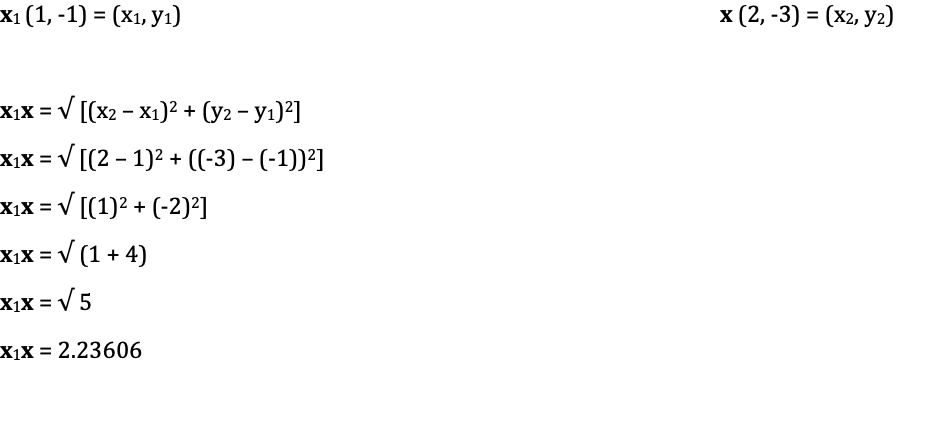

The Euclidean distance between the new observation ($\mathbf{x}$) and the second observation ($\mathbf{x}_2$):

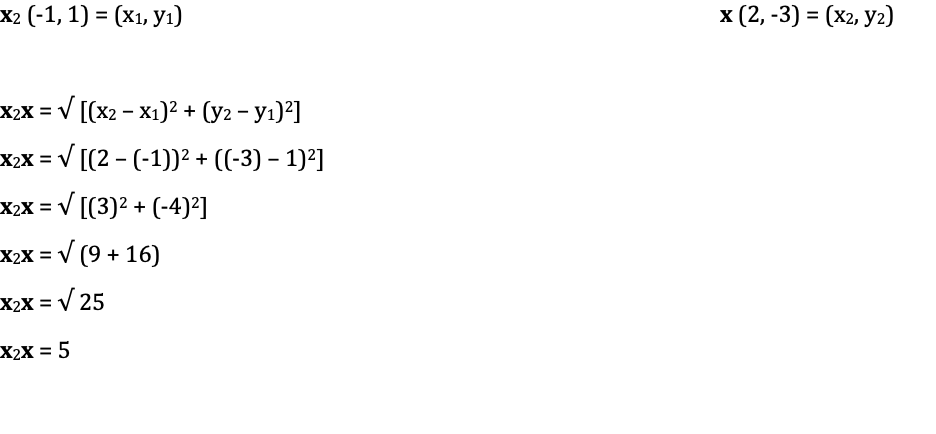

Now, a 1-nearest neighbour classifier based on the Euclidean distance would classify the observation $\mathbf{x} = (2, -3)$ as the class $y_1 = 0$, since it is closer or has a lower distance to the first observation compared to the second observation.

2. Consider a dataset $\mathcal{D}$ that only contains observations of two different classes. Explain why a $k$-nearest neighbour classifier does not need a tie-breaking policy when $k$ is odd.

KNN classifier classifies an unclassified observation by computing its nearest neighbours and assigning it the majority class among the nearest neighbours. Now if we have two different classes and the number of nearest neighbours k is odd, from which the majority class is being computed then there is no way for a tie to occur while determining the majority class among the nearest neighbours. For example, if k = 3 then one of the two classes must be occurring twice in the 3 nearest neighbours.

3. Consider a classifier tasked with predicting whether a medical test is positive. Suppose that this classifier has precision $1.0$ and recall $0.25$ on a test dataset. Should we trust the output of this classifier?

The given case with the classifier having precision 1.0 and recall 0.25 on a test dataset means that the cases identified as positive cases will be predicted correctly due to high precision, but it won’t do well on much of the entire dataset due to low recall.

4. Based on the confusion matrix shown in this lab notebook, what is the pair of classes that is most confusing for the $1$-nearest neighbour classifier trained in the previous sections?

The pair of classes that is most confusing for the 1-nearest neighbour classifier trained, based on the confusion matrix shown is “4” and “9” because 4 is predicted as 9 four times and 9 is predicted as 4 three times.

5. Train a support vector machine classifier using the same (subsampled) training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class ``SVC`` from ``sklearn.svm``.

In [ ]:
# Configure the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = gzip.open('mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm

svmachine  = svm.SVC()
svmachine.fit(X_train,y_train)

y_svmachine = svmachine.predict(X_test)

print('Testing  Accuracy', np.mean(y_svmachine==y_test))
print('The support vectors are', svmachine.support_vectors_.shape)

Testing  Accuracy 0.9275
The support vectors are (1044, 784)


The output above shows the testing accuracy, fitting a support vector machine classifier to the training dataset.

6. Using the same (subsampled) training dataset used in the previous sections, employ ``GridSearchCV`` to find the best hyperparameter settings based on 5-fold cross-validation for a ``RandomForestClassifier``. Consider ``n_estimators`` $ \in \{ 1, 2, 4, 8, 16, 32\}$ and ``max_features`` $ \in \{0.1, 0.25\}$. Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset. Show the code in the report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [1, 2, 4, 8, 16, 32], 'max_features': [0.1, 0.25]}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, parameters, cv=5)
rfc_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(max_features=0.1, n_estimators=32).
Average accuracy across folds of best hyperparameter setting: 0.8925000000000001.
Test dataset accuracy of best hyperparameter setting: 0.875.


7. Use tSNE to obtain a 2D embedding of the data points. Train a decision tree on this 2D dataset and produce a 2D region classification plot: each class in the dataset must be assigned a distinct colour; each pixel in the plot must be of the colour corresponding to the class predicted for a data point in that location. Do the same, but using a support vector machine instead of a decision tree.

In [ ]:
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

# Computing a projection using t-stochastic neighbour embedding
embedding = TSNE(n_components=2, perplexity=50, random_state=0)
Xp = embedding.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


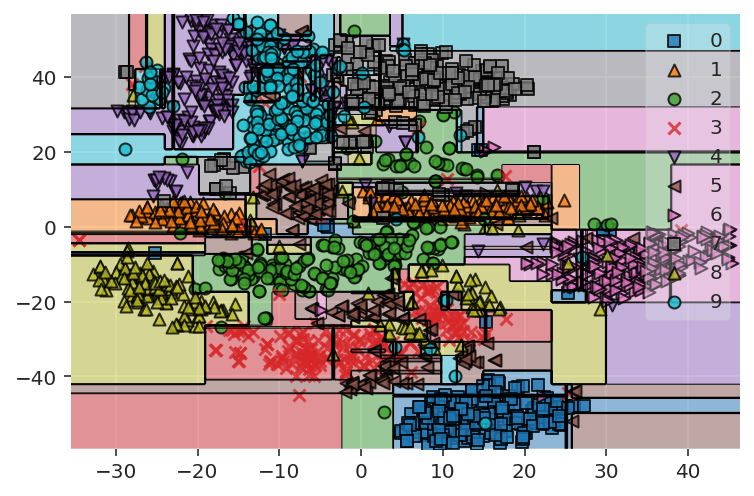

In [ ]:
from sklearn import tree

# Fitting a decision tree classifier
dtree = tree.DecisionTreeClassifier()
dtree.fit(Xp, y)

plot_decision_regions(Xp,y,clf=dtree)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


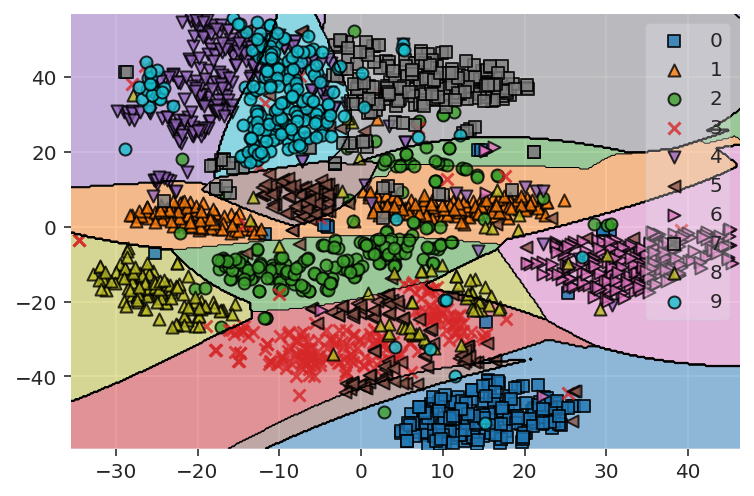

In [ ]:
from sklearn import svm

# Fitting a support vector machine
svmachine = svm.SVC()
svmachine.fit(Xp, y)

plot_decision_regions(Xp,y,clf=svmachine)